In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [342]:
matplotlib.__version__

'3.7.2'

In [343]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [344]:
# Path
path=r'/Users/kristenlehtinen/Documents/World Happiness Report/'

In [345]:
# Importing merged Data
merged_data= pd.read_csv(r'/Users/kristenlehtinen/Documents/World Happiness Report/02 Data/Original Data/merged world happiness report.csv')

In [346]:
# Checking head
merged_data.head()

,Year,Country,Happiness Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Governmental Trust,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [347]:
# Checking Shape
merged_data.shape

(782, 10)

In [348]:
# Mixed-type Data
for col in merged_data.columns.tolist():
      weird = (merged_data[[col]].applymap(type) != merged_data[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (merged_data[weird]) > 0:
        print (col)


/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_54831/4176463142.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (merged_data[[col]].applymap(type) != merged_data[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_54831/4176463142.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (merged_data[[col]].applymap(type) != merged_data[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_54831/4176463142.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (merged_data[[col]].applymap(type) != merged_data[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_54831/4176463142.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (merged_data[[col]].applymap

In [349]:
# Identifying non-numeric columns
non_numeric_columns = merged_data.select_dtypes(exclude=['float', 'int']).columns

# Dropping the non-numeric columns
merged_data_numeric = merged_data.drop(columns=non_numeric_columns)

# Correlation matrix
correlation_matrix = merged_data_numeric.corr()

In [350]:
# Correlation Matrix

merged_data_numeric.corr()

,Year,Happiness Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Governmental Trust,Generosity
Year,1.000000,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,0.200791,-0.192587
Happiness Rank,-0.007768,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.280117,-0.117713
Happiness Score,0.007065,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.291049,0.137578
Economy,0.019768,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.183975,-0.014560
Social Support,0.367431,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.280172,-0.037262
Life Expectancy,0.130302,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.156373,0.010638
Freedom,0.010353,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.523538,0.290706
Governmental Trust,0.200791,-0.280117,0.291049,0.183975,0.280172,0.156373,0.523538,1.000000,0.083846
Generosity,-0.192587,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.083846,1.000000


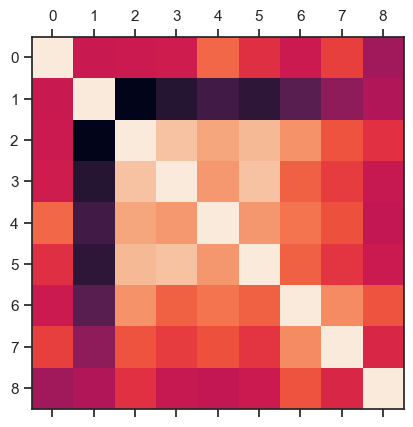

In [351]:
# Creating a correlation heatmap using matplotlib

plt.matshow(merged_data_numeric.corr())
plt.show()

In [352]:
#current dir
cwd = os.getcwd()
cwd

'/Users/kristenlehtinen/Documents/World Happiness Report/04 Analysis'

In [353]:
# Changing Directory 

new_directory = '/Users/kristenlehtinen/Documents/World Happiness Report/04 Analysis'

os.chdir(new_directory)

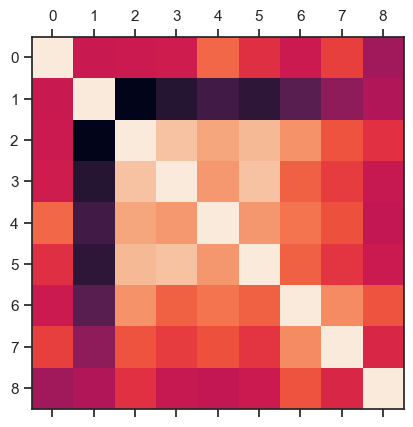

In [354]:
# Save figure
plt.matshow(merged_data_numeric.corr())
plt.savefig("out.png") 

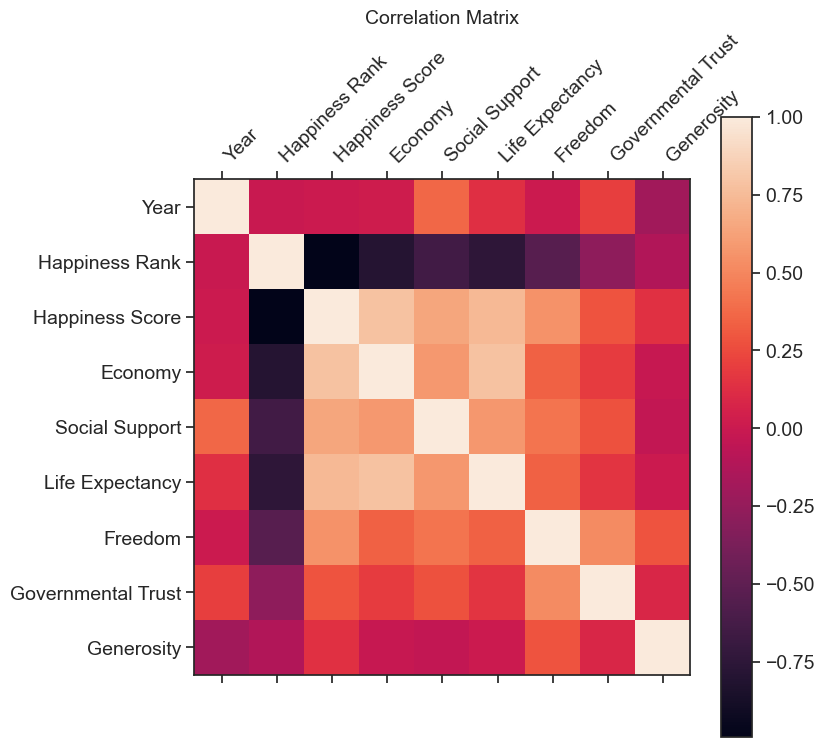

In [355]:
f = plt.figure(figsize=(8, 8))  # Create a figure object with a specific size (8x8 inches)
plt.matshow(merged_data_numeric.corr(), fignum=f.number)  # Plot the correlation matrix heatmap using matshow
plt.xticks(range(merged_data_numeric.shape[1]), merged_data_numeric.columns, fontsize=14, rotation=45, ha='left')  # Set x-axis labels with rotation, font size, and left alignment
plt.yticks(range(merged_data_numeric.shape[1]), merged_data_numeric.columns, fontsize=14)  # Set y-axis labels with font size
cb = plt.colorbar()  # Add a colorbar to show the scale of correlation values
cb.ax.tick_params(labelsize=14)  # Set the font size of colorbar labels
plt.title('Correlation Matrix', fontsize=14)  # Add a title to the plot

plt.show()  # Display the plot

### The closer the variables are to 1, the happier the country is. Therefore if the economy, social support, life expectancy, freedom, governmental trust, and gernerosity are closer to 1, the happiness rank is higher. 

In [356]:
merged_data_numeric.columns

Index(['Year', 'Happiness Rank', 'Happiness Score', 'Economy',
       'Social Support', 'Life Expectancy', 'Freedom', 'Governmental Trust',
       'Generosity'],
      dtype='object')

In [357]:
# Create a subset excluding the "Date" and "No" columns

sub = merged_data_numeric[['Year', 'Happiness Rank', 'Happiness Score', 'Economy','Social Support', 'Life Expectancy','Freedom','Governmental Trust','Generosity']]

In [358]:
sub

,Year,Happiness Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Governmental Trust,Generosity
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
777,2019,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,2019,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,2019,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,2019,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


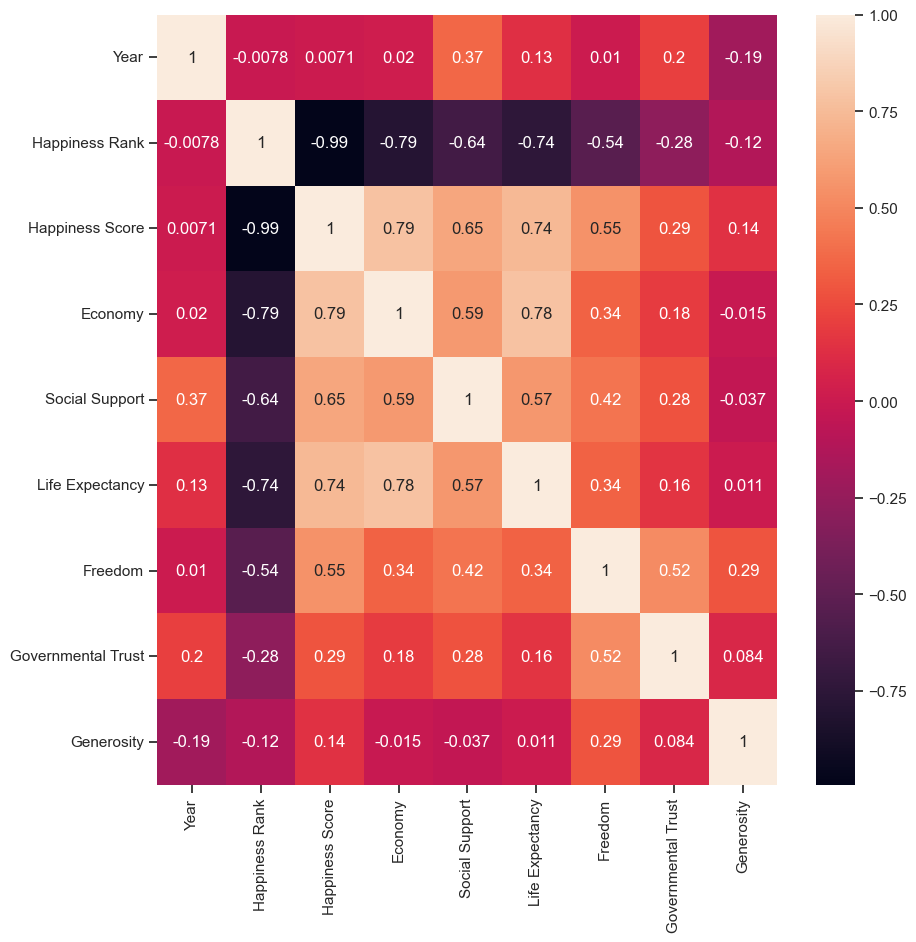

In [359]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Heatmap findings, the happiness score has a positive correlation with freedom, life expectancy, social support, and economy. Economy has a strong, positive correlation with life expectancy. Generosity, governmental trust and freedom have less of an impact on happiness score. 

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


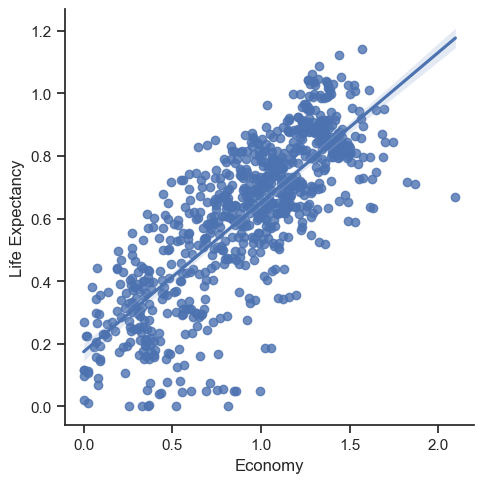

In [360]:
# Create a scatterplot for the "Economy" and "Life Expectancy" columns in seaborn

sns.lmplot(x = 'Economy', y = 'Life Expectancy', data = merged_data_numeric)

### Life expectancy/health and economy have a strong, positive relationship. 

# Is there a correlation between a country’s economy (GDP) and its Happiness Score?

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


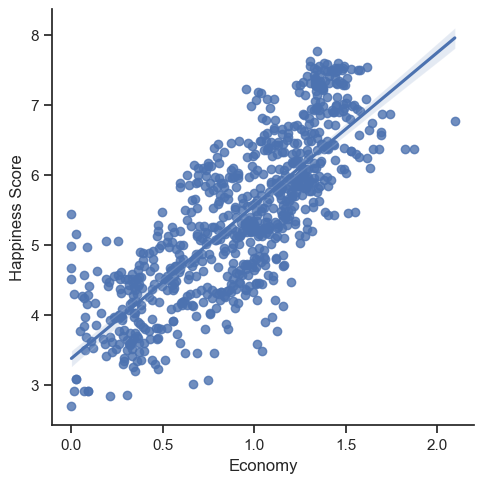

In [361]:
# Create a scatterplot for the "Economy" and "Life Expectancy" columns in seaborn

sns.lmplot(x = 'Economy', y = 'Happiness Score', data = merged_data_numeric)

### Happiness score and the economy have a high positive correlation. 

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


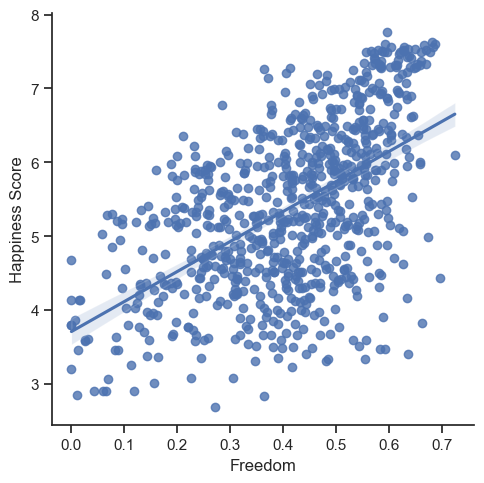

In [362]:
# Create a scatterplot for the "Economy" and "Life Expectancy" columns in seaborn

sns.lmplot(x = 'Freedom', y = 'Happiness Score', data = merged_data_numeric)

### Freedom has a positive correlation to happiness score, but not as strong as the economy. 

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


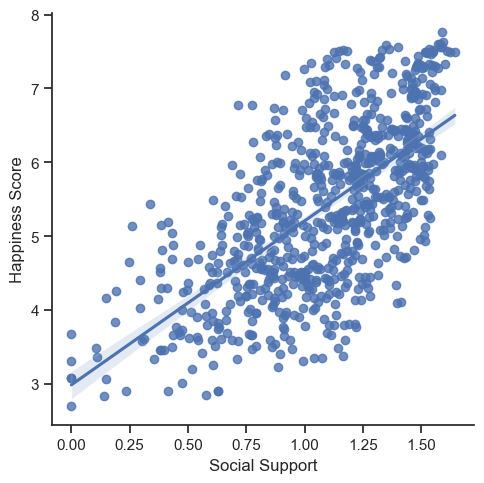

In [363]:
# Create a scatterplot for the "Economy" and "Life Expectancy" columns in seaborn

sns.lmplot(x = 'Social Support', y = 'Happiness Score', data = merged_data_numeric)

### Happiness and Social Support have a positive correlation. 

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


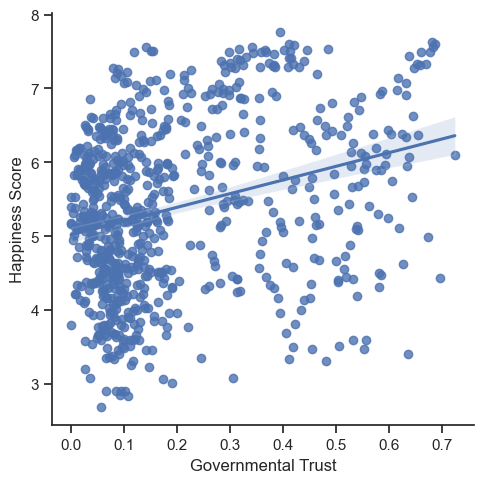

In [364]:
# Create a scatterplot for the "Economy" and "Life Expectancy" columns in seaborn

sns.lmplot(x = 'Governmental Trust', y = 'Happiness Score', data = merged_data_numeric)

### There is not a relationship between happiness score and governmental trust. 

In [365]:
# Pair Plots
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Year', 'Happiness Rank', 'Happiness Score', 'Economy','Social Support', 'Life Expectancy','Freedom','Governmental Trust','Generosity']]

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

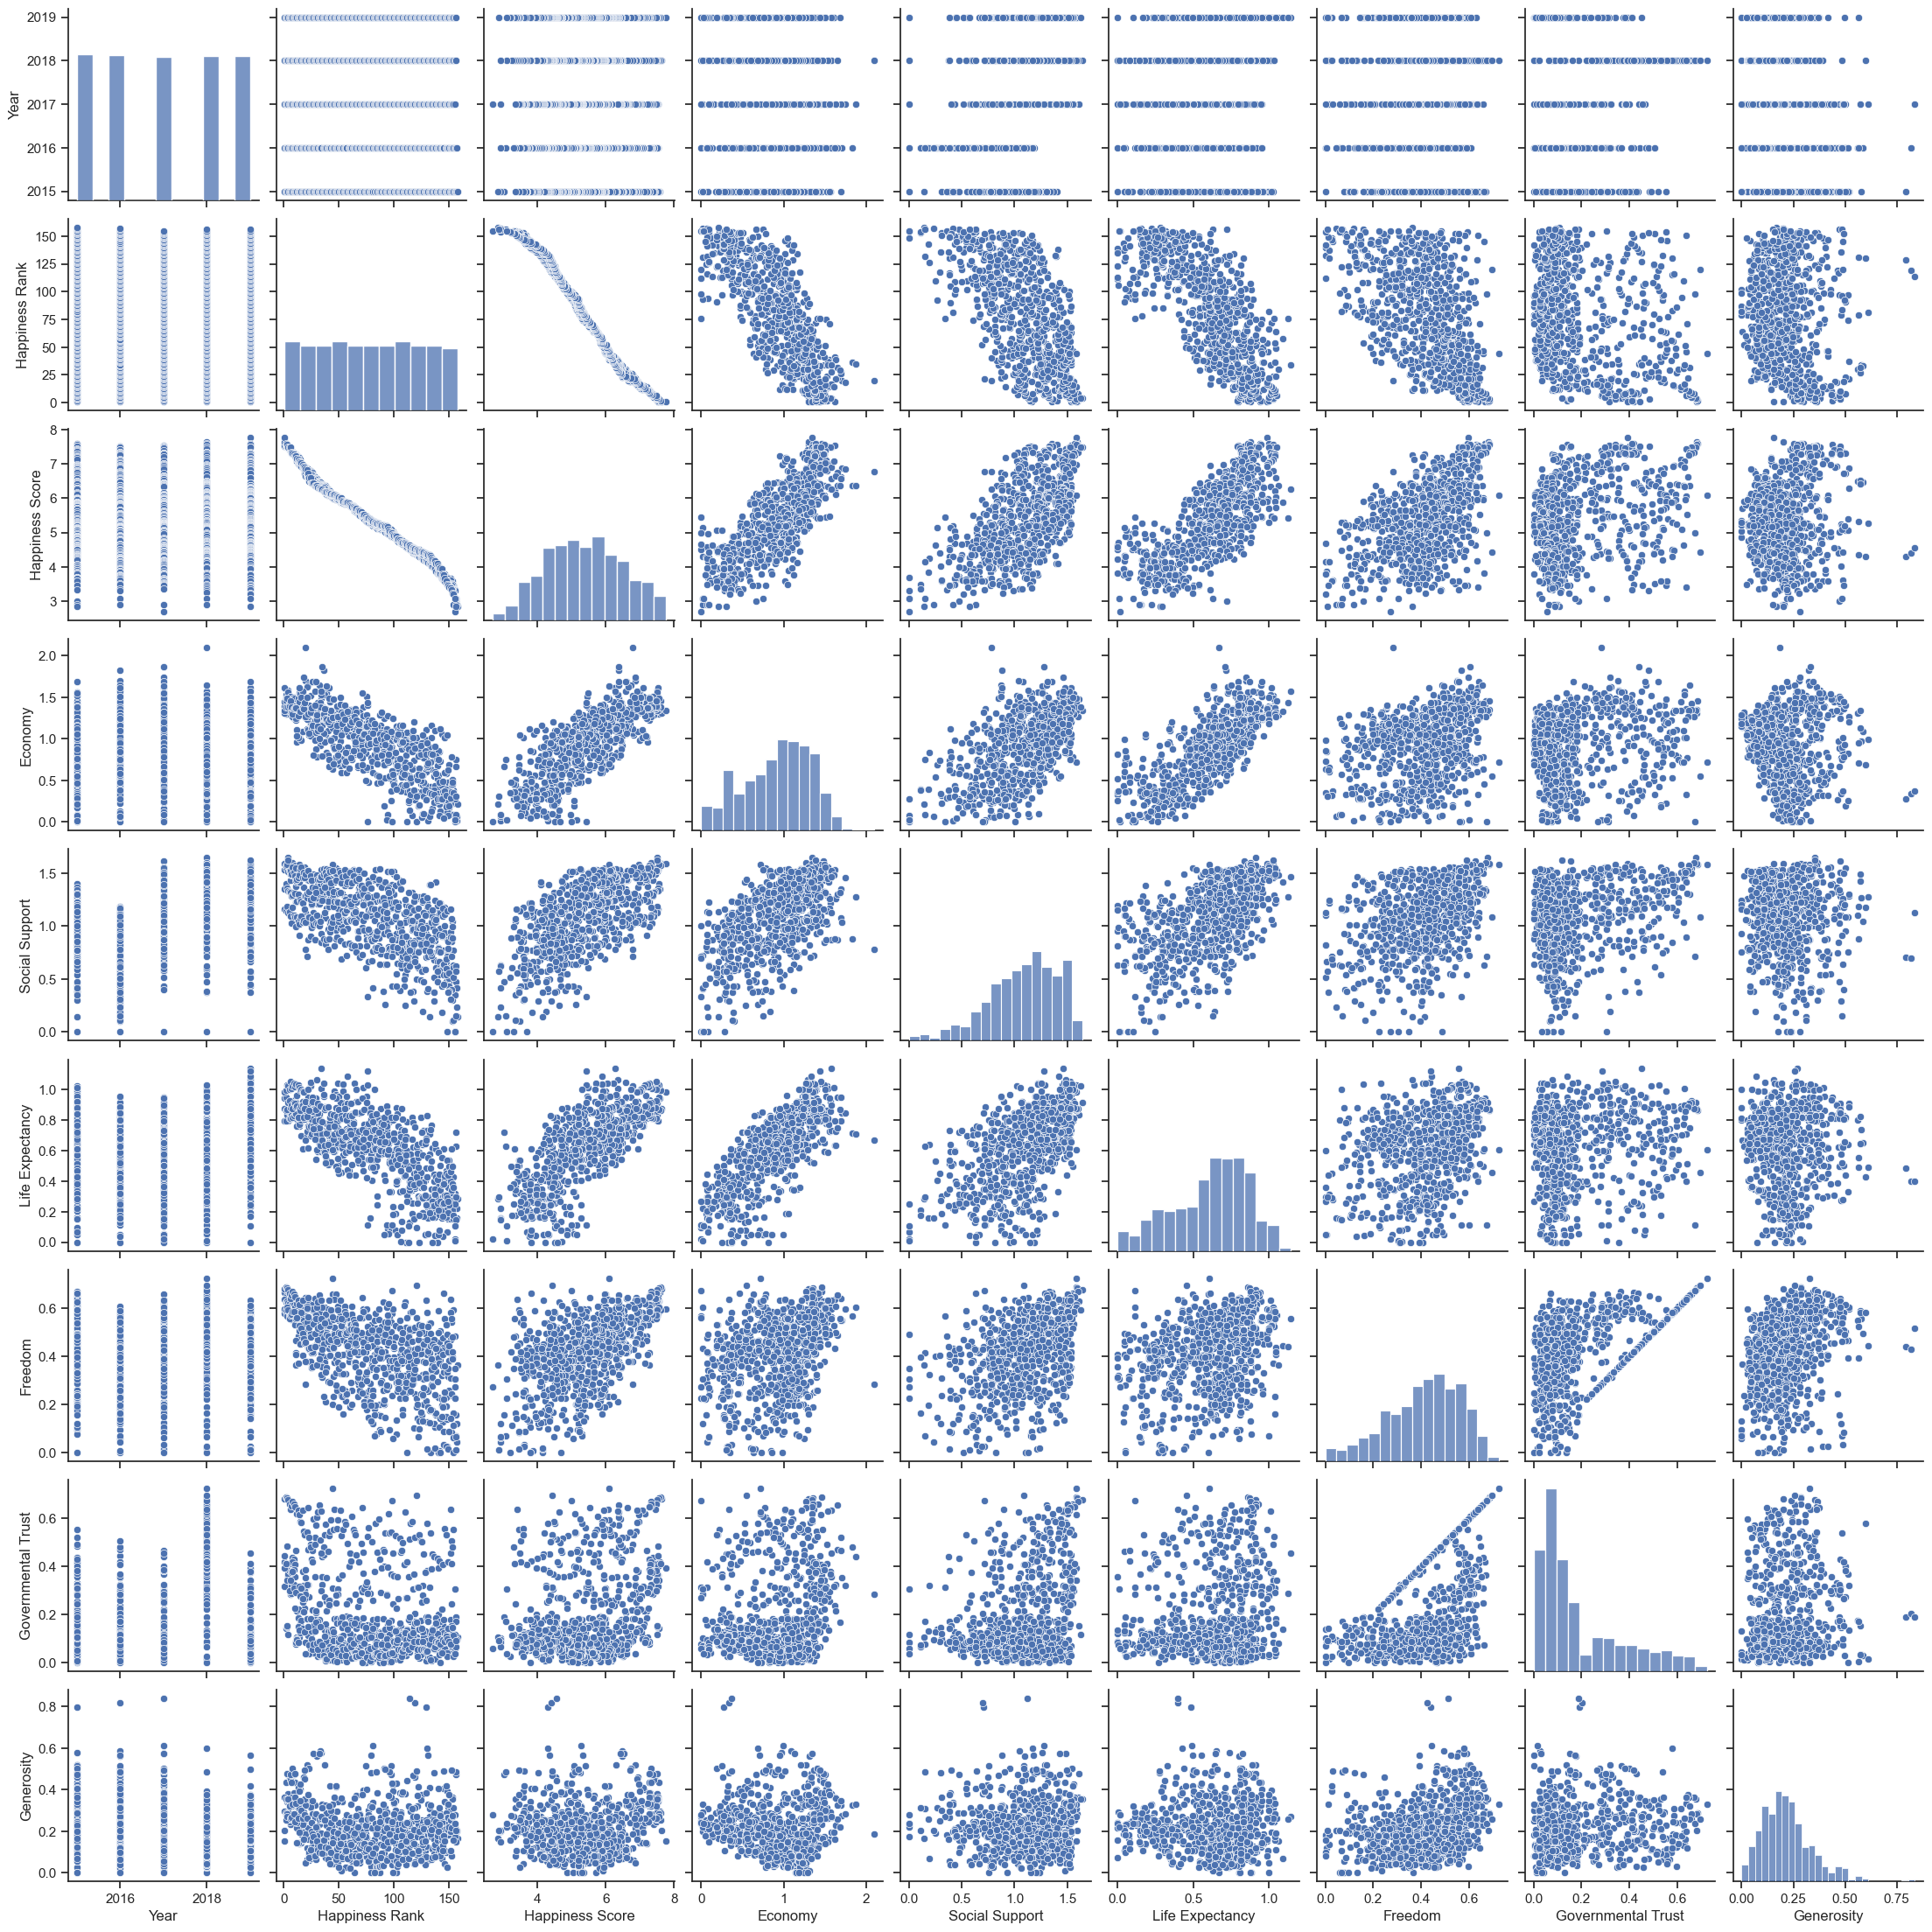

In [366]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### I thought it was interesting that the economy and life expectancy have a strong relationship. It looks like governmental trust and generosity have less of an impact on happiness scores. 

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life Expectancy', ylabel='Count'>

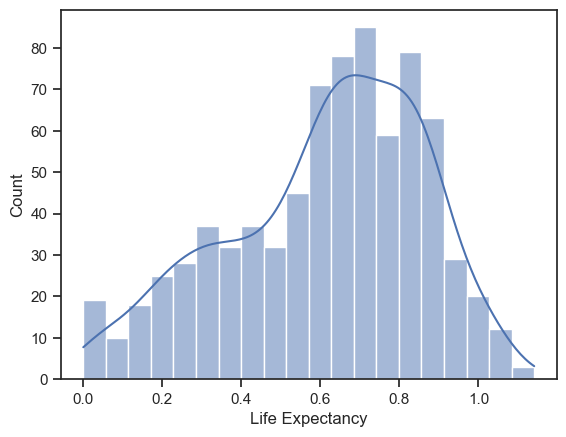

In [367]:
# Use a histogram to visualize the distribution of the variables. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(merged_data_numeric['Life Expectancy'], bins = 20, kde = True)

In [368]:
# Life expectancy Categories 
merged_data_numeric.loc[merged_data_numeric['Life Expectancy'] < 0.5, 'Life Expectancy category'] = 'Low life expectancy'
merged_data_numeric.loc[(merged_data_numeric['Life Expectancy'] >= 0.5) & (merged_data_numeric['Life Expectancy'] < 1.0), 'Life Expectancy category'] = 'Medium life expectancy'
merged_data_numeric.loc[merged_data_numeric['Life Expectancy'] >= 1.0, 'Life Expectancy category'] = 'High life expectancy'

In [369]:
merged_data_numeric['Life Expectancy category'].value_counts(dropna = False)

Life Expectancy category
Medium life expectancy    532
Low life expectancy       227
High life expectancy       23
Name: count, dtype: int64

In [370]:
merged_data_numeric.columns

Index(['Year', 'Happiness Rank', 'Happiness Score', 'Economy',
       'Social Support', 'Life Expectancy', 'Freedom', 'Governmental Trust',
       'Generosity', 'Life Expectancy category'],
      dtype='object')

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


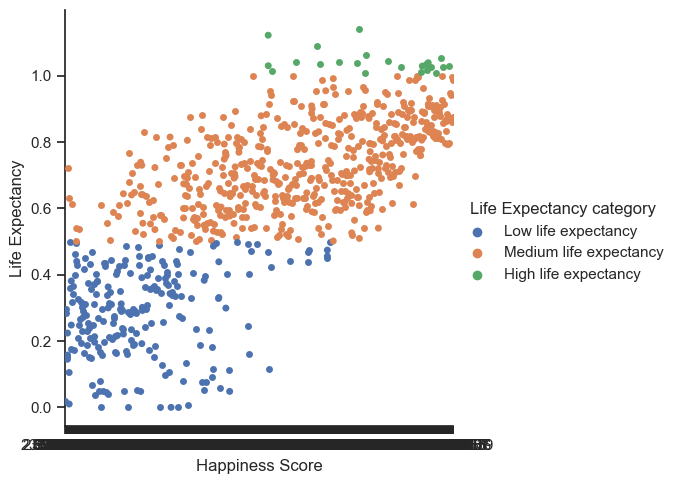

In [371]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Happiness Score", y="Life Expectancy", hue="Life Expectancy category", data=merged_data_numeric)

### I can't figure out how to show the happiness score on the X axis? That being said, life expectancy is higher based on the happiness score of the country. 

#### Data Questions: 

#Is there a correlation between a country’s GDP and its Happiness Score? Yes! There is a high correlation between the economy and happiness score. 

#How does social support affect Happiness Scores? There is a strong relationship between happiness scores and social support. 

#How does health affect a country’s happiness score? There is a strong relationhsip between a country's happiness score and health (life expectancy). 

#Is there a connection between freedom and happiness levels? There is positive correlation between freedom and happiness. 

#Is there a connection between a country’s trust in the government and happiness? There is not a strong relationship between governmental trust and happiness.  

#Do countries with higher levels of generosity have higher happiness scores? There is not a strong relationship between generosity and happiness scores, so I believe it is not different for various countries. 

#Are there any specific factors that are associated with lower happiness scores? The variables that impact the happiness scores the most, are economy, health (life expectancy), freedom, and social support. If those numbers are low, then the country will score lower on the happiness levels. 


/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


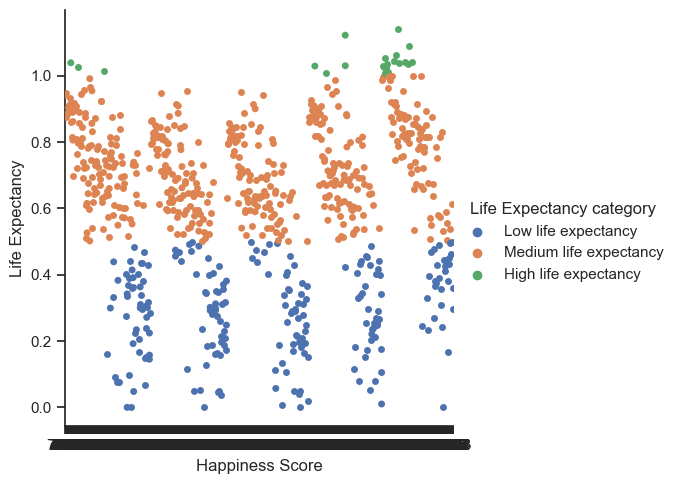

In [372]:
 import seaborn as sns

# Plot using Seaborn catplot
sns.set(style="ticks")
g = sns.catplot(x="Happiness Score", y="Life Expectancy", hue="Life Expectancy category", 
                data=merged_data_numeric, order=merged_data_numeric['Happiness Score'].unique())

In [373]:
# fig = g.get_figure()
g.savefig("out.png") 